In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [654]:
df = pd.read_csv("abalone.data", names=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings'] )

In [655]:
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [656]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [657]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [658]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [659]:
df.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [660]:
df.shape

(4177, 9)

In [661]:
sex_dictionary = {'M': 1, 'F' : 2,'I':3}
df['Sex'] = df['Sex'].apply(lambda x: sex_dictionary[x])

In [662]:
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [663]:
df.select_dtypes(include=['object']).isnull().sum()
df.select_dtypes(include=[np.number]).isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

# Adding age column in the dataframe for classification. Age is classified based on the number of rings.
Rings 1-8 -->Age 1, denoting young

Rings 9-16 -->Age 2, denoting middle

Rings 17-29 -->Age 3, denoting old

In [664]:
def label_race (row):
   if row['Rings'] >=1 and row['Rings'] <=8:
      return 1
   elif row['Rings'] >=9 and row['Rings'] <=16:
      return 2
   elif row['Rings'] >=17 and row['Rings'] <=29:
      return 3
   return 0   

In [665]:
df['Age'] = df.apply(lambda _: '', axis=1)

In [666]:
df['Age']=df.apply (lambda row: label_race (row),axis=1)
df.Sex = df.Sex.astype(float)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


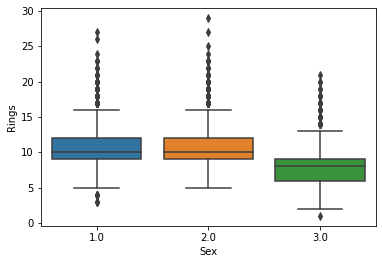

In [667]:
ax = sns.boxplot(x="Sex", y="Rings", data=df)
plt.show(ax)

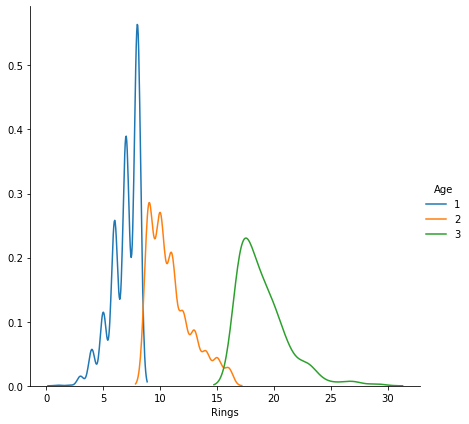

In [668]:
bx = sns.FacetGrid(df, hue="Age", size=6) \
   .map(sns.kdeplot, "Rings") \
   .add_legend()
plt.show(bx)

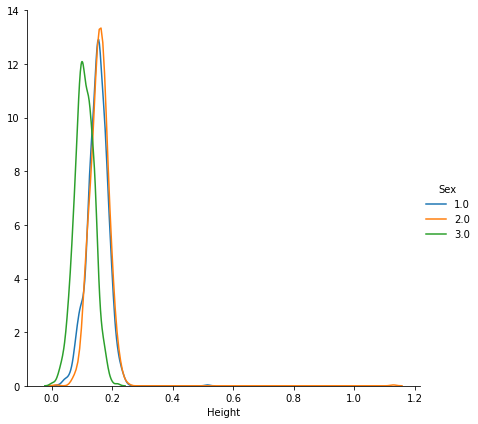

In [669]:
cx = sns.FacetGrid(df, hue="Sex", size=6) \
   .map(sns.kdeplot, "Height") \
   .add_legend()
plt.show(cx)

In [670]:
Y = df[['Age']]
Y.head()

,Age
0,2
1,1
2,2
3,2
4,1


In [671]:
X=df.drop(['Age','Rings'], axis=1)
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


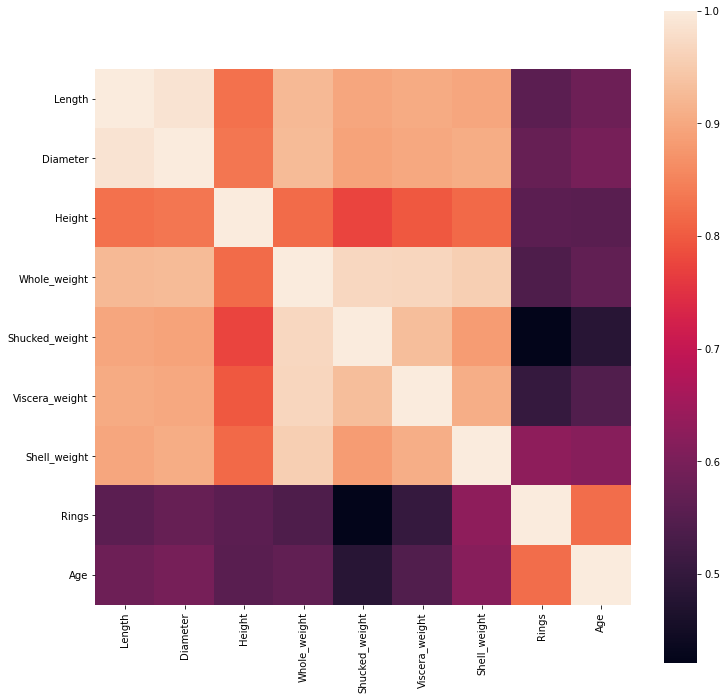

In [672]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)
plt.show()

<Figure size 432x288 with 0 Axes>

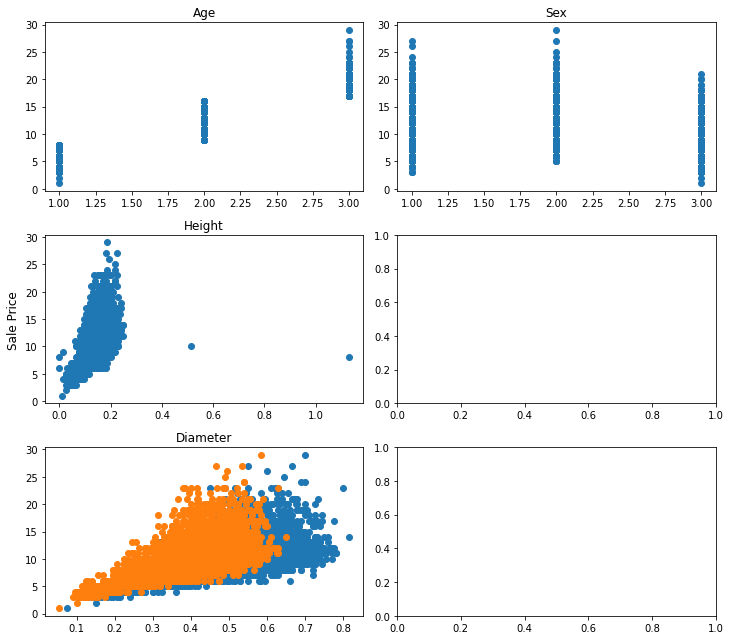

In [673]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
ring = df.Rings.values
axarr[0, 0].scatter(df.Age.values, ring)
axarr[0, 0].set_title('Age')
axarr[0, 1].scatter(df.Sex.values, ring)
axarr[0, 1].set_title('Sex')
axarr[1, 0].scatter(df.Height.values, ring)
axarr[1, 0].set_title('Height')
axarr[2, 0].scatter(df.Length.values, ring)
axarr[2, 0].set_title('Length')
axarr[2, 0].scatter(df.Diameter.values, ring)
axarr[2, 0].set_title('Diameter')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

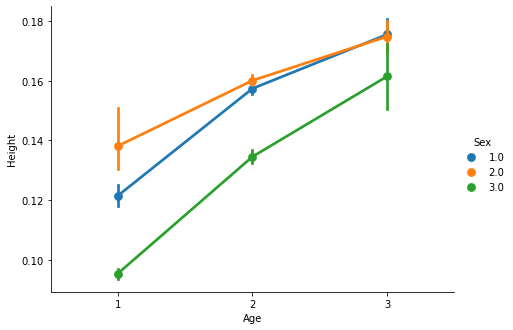

In [674]:
sns.factorplot('Age', 'Height', hue = 'Sex', estimator = np.mean, data = df, 
             size = 4.5, aspect = 1.4)
plt.show()

In [675]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y)

In [676]:
print("train_df_x:")
print(train_X.shape)

print("train_df_y:")
print(train_y.shape)

print("test_df_x:")
print(test_X.shape)

print("test_df_y:")
print(test_y.shape)

train_df_x:
(3132, 8)
train_df_y:
(3132, 1)
test_df_x:
(1045, 8)
test_df_y:
(1045, 1)


In [677]:
def getAccuracy(testSet, predictions):

    correct = 0

    for x in range(len(testSet)):

        if testSet[x][-1] == predictions[x]:

            correct += 1

    return (correct/float(len(testSet))) * 100.0

# LogisticRegression

In [678]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.linear_model as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, median_absolute_error
import math
from sklearn import metrics


#logistic regression
log_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
log_reg.fit(train_X, train_y)
print ("Intercept is ",log_reg.intercept_)
print("Coefficient is ",log_reg.coef_)
y_pred=log_reg.predict(test_X) 



#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)
    
print("Accuracy of Logistic Regression is:")
print(accuracy_score(test_y, y_pred)*100)


#Mean Absolute Error 
mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))

#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))

#Median Absolute error
Medae=median_absolute_error(test_y,y_pred)
print("Median Absolute Error:"+str(Medae)) 


print("Classification report for Test data %s:\n%s\n\n"
     % (log_reg, metrics.classification_report(test_y, y_pred)))

Intercept is  [ 2.92255368 -0.10345869 -2.81909499]
Coefficient is  [[ 0.31774251 -1.22626983 -2.00815881 -1.38531999 -2.54790187  5.27931495
  -0.89077099 -5.36077391]
 [-0.14999005  1.34211135  1.76898747  0.48962042 -0.3221878   0.09561315
   1.73788653  0.6952856 ]
 [-0.16775246 -0.11584152  0.23917134  0.89569956  2.87008967 -5.3749281
  -0.84711554  4.6654883 ]]
Confusion Matrix
Accuracy of Logistic Regression is:
79.90430622009569
MAE:0.20095693779904306
RMSE:0.4482822077654243
Median Absolute Error:0.0
Classification report for Test data LogisticRegression(multi_class='multinomial', solver='newton-cg'):
              precision    recall  f1-score   support

           1       0.79      0.75      0.77       371
           2       0.81      0.88      0.84       631
           3       1.00      0.02      0.05        43

    accuracy                           0.80      1045
   macro avg       0.86      0.55      0.55      1045
weighted avg       0.81      0.80      0.78      1045



In [679]:
def confusion_matrix_data(conf_matrix):
    fix, ax = plt.subplots(figsize=(16, 12))
    plt.suptitle('Confusion Matrix  on Data Set')
    for ii, values in conf_matrix.items():
        matrix = values['matrix']
        title = values['title']
        plt.subplot(2, 2, ii) # starts from 1
        plt.title(title);
        sns.heatmap(matrix, annot=True,  fmt='');

# MLPClassifier

In [680]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
#neural network
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

neural_network_class=MLPClassifier(hidden_layer_sizes=(20,10,20))
neural_network_class.fit(train_X,train_y)
predictions = neural_network_class.predict(test_X)
y_pred=predictions



#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)
    
print("Accuracy of Neural Networks is")
print(accuracy_score(test_y, y_pred)*100)

#Mean Absolute Error 

mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))
#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))
#Median Absolute error
Medae=median_absolute_error(test_y,y_pred)
print("Median Absolute Error:"+str(Medae)) 


print("Classification report for Test data %s:\n%s\n\n"
     % (scaler, metrics.classification_report(test_y, y_pred)))

Confusion Matrix
Accuracy of Neural Networks is
81.05263157894737
MAE:0.18947368421052632
RMSE:0.435285750066007
Median Absolute Error:0.0
Classification report for Test data StandardScaler():
              precision    recall  f1-score   support

           1       0.81      0.75      0.78       371
           2       0.81      0.90      0.85       631
           3       0.67      0.05      0.09        43

    accuracy                           0.81      1045
   macro avg       0.76      0.57      0.57      1045
weighted avg       0.81      0.81      0.79      1045





# KNN Classifier

In [681]:
# Create an instance of KNeighborsClassifier and then fit training data
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(train_X,train_y)
# Make class predictions for all observations in X
y_pred = clf.predict(test_X)


#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)

print("Accuracy of KNN Classifier is:")
print(accuracy_score(test_y, y_pred)*100)

#Mean Absolute Error 

mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))
#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))
#Median Absolute error
Medae=median_absolute_error(test_y,y_pred)
print("Median Absolute Error:"+str(Medae))  


print("Classification report for Test data %s:\n%s\n\n"
     % (clf, metrics.classification_report(test_y, y_pred)))



Confusion Matrix
Accuracy of KNN Classifier is:
78.75598086124403
MAE:0.21244019138755982
RMSE:0.46091234675104964
Median Absolute Error:0.0
Classification report for Test data KNeighborsClassifier():
              precision    recall  f1-score   support

           1       0.78      0.71      0.75       371
           2       0.79      0.88      0.83       631
           3       0.57      0.09      0.16        43

    accuracy                           0.79      1045
   macro avg       0.72      0.56      0.58      1045
weighted avg       0.78      0.79      0.77      1045





# using RandomForestClassifier() with hyperparameter tranning

In [682]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(train_X)
X_test = scalar.transform(test_X)

In [683]:
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [684]:
classifier = [SGDRegressor(),LinearRegression(),LinearSVR(),DecisionTreeRegressor(),RandomForestRegressor()]

In [685]:
ran_forest_class = RandomForestClassifier()
param_grid = [
    {
        'n_estimators':[3, 10],
        'max_features': [2, 4, 6, 8],
        'bootstrap': [ False ],
        'criterion': ['gini', 'entropy']
    }
]
grid_search = GridSearchCV(ran_forest_class, param_grid, cv =5, scoring = "neg_mean_squared_error", return_train_score = True)
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [False],
                          'criterion': ['gini', 'entropy'],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [686]:
best_est = grid_search.best_estimator_
y_predict = best_est.predict(X_test)
finalMSE = mean_squared_error(test_y, y_predict)
finalRMSE = np.sqrt(finalMSE)
print(f'root mean square error :{finalRMSE}')

root mean square error :0.4762292078119587
